# MT copy number 

In [1]:
import os
import csv
import sys

path = 'offtarget'

fileOut=open('offtarget.WXS.csv',"w")
fileOut.write('ID,cov\n')

for f in os.listdir(path):
    file=open("./offtarget/"+f)
    reader=csv.reader(file)
    cov=0.0
    count=0
    for line in reader:
            x=int(line[1])
            y=int(line[2])
            if y>x:
                if line[3]=="":
                    n=0.0
                else:
                    n=float(line[3])
                cov+=n/(y-x)
                count+=1
        
    fileOut.write(f.replace('.offtarget.cov','')+","+str(cov/count))
    fileOut.write("\n")


In [2]:
#gi|23898|emb|X12811.1|  28      2
#gi|23898|emb|X12811.1|  29      2
#MT 16569 bp    DNA



import os
import csv
import sys

path = './MT/cov/'

fileOut=open('MT.WXS.csv',"w")
fileOut.write('ID,cov.MT\n')



for f in os.listdir(path):
    file=open("./MT/cov/"+f)
    reader=csv.reader(file, delimiter="\t")
    cov=0
    
    
    for line in reader:
        ref=line[0]
        n=int(line[2])
        cov+=n
        
            
        
    fileOut.write(f.replace('.sort.MT.cov','')+","+str(cov/16569.0))
    fileOut.write("\n")
    
    

In [3]:
import pandas as pd
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
df_MT = pd.read_csv('MT.WXS.csv')

df_MT.head()

df = pd.read_csv('offtarget.WXS.csv')
data=pd.merge(df_MT, metadata, on='ID')
data_cov_WXS=pd.merge(df, data, on='ID')


data_cov_WXS['cov_MT_norm'] = data_cov_WXS['cov.MT']/data_cov_WXS['cov']
data_cov_WXS.head()

,ID,cov,cov.MT,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,...,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0,cov_MT_norm
0,003860a34c9b244a5d8435b220ca5673,5.390855,60.111896,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN,11.150716
1,04dad306f9be80db39f4be578091aa11,4.966536,194.140141,246,TCGA-BH-A1EY,TCGA-BH-A1EY-01A-11D-A13L-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,7.0,6.0,7.0,6.0,0741b5db-4405-42ba-b63a-c6ee4f341480,NaN,39.089646
2,08886fe521e2ff176295468dc519d9f3,3.162184,43.398334,197,TCGA-A7-A13G,TCGA-A7-A13G-01B-04D-A22N-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,8.0,6.0,7.0,5.0,6cd9baf5-bbe0-4c1e-a87f-c53b3af22890,NaN,13.724165
3,09f52a751a3bd08f2fd4dcc61a046ed0,4.683656,295.264168,256,TCGA-C8-A1HK,TCGA-C8-A1HK-01A-21D-A13L-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,8.0,6.0,7.0,6.0,52c35691-efca-42f5-a03e-02c9f872275c,NaN,63.041392
4,0e66d92c70e71ca68bc7df03f140ac23,3.325347,434.680186,188,TCGA-A2-A25D,TCGA-A2-A25D-01A-12D-A16D-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,9.0,8.0,9.0,8.0,3b963d72-ba5c-467b-83c9-fbdb462510a3,NaN,130.717258


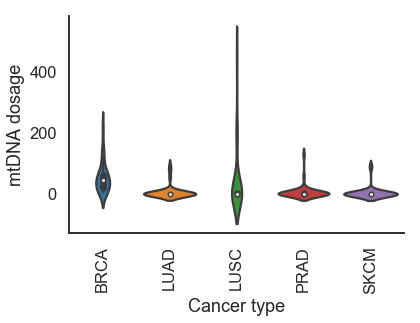

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.violinplot(x="disease", y="cov_MT_norm", data=data_cov_WXS)
#g=sns.stripplot(x="disease", y="cov_MT_norm", data=data_cov_WXS, palette=["black"], jitter=0.05)
g.set(xlabel='Cancer type', ylabel='mtDNA dosage')
g=sns.despine()
plt.xticks(rotation=90)
plt.savefig("MT.cov.png", bbox_inches='tight')
plt.savefig("MT.cov.pdf", bbox_inches='tight')

In [7]:
data_cov_WXS.groupby("disease")['cov_MT_norm'].describe()

,count,mean,std,min,25%,50%,75%,max
disease,,,,,,,,
BRCA,28.0,55.872757,49.294482,7.322916,21.284816,46.610163,64.263578,219.430464
LUAD,38.0,7.633469,20.710514,0.294427,0.765592,1.375362,2.202561,93.182584
LUSC,34.0,40.250030,97.537491,0.559916,0.943314,1.547341,4.705565,454.364298
PRAD,43.0,7.697057,21.550747,0.531046,1.277495,1.819046,3.518921,130.645286
SKCM,22.0,5.288450,19.055388,0.261084,0.540583,1.246025,1.757495,90.514711


In [8]:
BRCA = data_cov_WXS[(data_cov_WXS['disease'] == 'BRCA')]
LUSC = data_cov_WXS[(data_cov_WXS['disease'] == 'LUSC')]
SKCM = data_cov_WXS[(data_cov_WXS['disease'] == 'SKCM')]
PRAD = data_cov_WXS[(data_cov_WXS['disease'] == 'PRAD')]
LUAD = data_cov_WXS[(data_cov_WXS['disease'] == 'LUAD')]

In [9]:
from scipy import stats
print stats.ttest_ind(BRCA['cov_MT_norm'],SKCM['cov_MT_norm'], equal_var = False)
print stats.ttest_ind(BRCA['cov_MT_norm'], PRAD['cov_MT_norm'], equal_var = False)
print stats.ttest_ind(BRCA['cov_MT_norm'], LUAD['cov_MT_norm'], equal_var = False)

Ttest_indResult(statistic=4.977249653513917, pvalue=1.5561325041801216e-05)
Ttest_indResult(statistic=4.8768275922581195, pvalue=2.5119633163663858e-05)
Ttest_indResult(statistic=4.8711323760995935, pvalue=2.5122332205999794e-05)


In [10]:
import pandas as pd
metadata=pd.read_csv('../outcomes/PILOT.RNASeq.clean.metadata.csv')
df_MT = pd.read_csv('MT.RNASeq.csv')
data_MT=pd.merge(df_MT, metadata, on='ID')

depth_RNASeq=pd.read_csv('../bams/NR.RNASeq.csv')
data_RNASeq_cov=pd.merge(data_MT, depth_RNASeq, on='ID')

data_RNASeq_cov['cov.MT.RNASeq.norm'] = (data_RNASeq_cov['cov.MT.RNASeq']/data_RNASeq_cov['NR'])*1000000


data_MT.head()

,ID,cov.MT.RNASeq,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,clinical_data_Breslow_thickness,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,022dd75d-0977-40b5-8804-bf0a281c149b_gdc_realn...,446.944294,9,TCGA-21-1082,TCGA-21-1082-01A-01R-0692-07,RNASeq,NaN,NaN,NaN,NaN,...,61.0,TCGA,LUSC,1,8.0,7.0,8.0,6.0,0e2ee54a-51c9-4868-842d-a2a1c1cfb016,NaN
1,06ab660e-2766-4c97-8f2e-b8495ddc0880_gdc_realn...,358.926912,230,TCGA-BF-A5EP,TCGA-BF-A5EP-01A-12R-A27Q-07,RNASeq,NaN,NaN,NaN,70.0,...,75.0,TCGA,SKCM,1,8.0,6.0,8.0,6.0,888ef0fc-fc84-4afb-a369-695fee5ae4f6,NaN
2,0ade1371-b218-4f01-a39e-b503d30d24e0_gdc_realn...,209.912910,373,TCGA-HC-7210,TCGA-HC-7210-01A-11R-2118-07,RNASeq,NaN,NaN,NaN,NaN,...,74.0,TCGA,PRAD,1,7.0,6.0,7.0,5.0,6a5af80e-07ad-4cd3-aaab-5db1090835d9,NaN
3,0afa74a0-7a7c-4b48-a253-45070049ceea_gdc_realn...,150.618806,281,TCGA-E2-A9RU,TCGA-E2-A9RU-01A-11R-A41B-07,RNASeq,NaN,NaN,NaN,NaN,...,90.0,TCGA,BRCA,1,7.0,6.0,7.0,6.0,6f18f96e-c0c9-4cc4-9fb2-cba8949d5402,NaN
4,0e0dd65a-4a41-4f6c-9ff9-d3cea84de4d7_gdc_realn...,136.492546,381,TCGA-HC-7817,TCGA-HC-7817-01B-11R-A29R-07,RNASeq,NaN,NaN,NaN,NaN,...,52.0,TCGA,PRAD,1,9.0,7.0,8.0,7.0,f3aa40b9-7b4d-465a-b7c9-591aebdb56c2,NaN


In [11]:
data_RNASeq_cov2 = data_RNASeq_cov[['patientBarcode','cov.MT.RNASeq','cov.MT.RNASeq.norm']]
data_cov_WXS2=data_cov_WXS[['patientBarcode','cov_MT_norm','disease']]
data_cov_both=pd.merge(data_RNASeq_cov2, data_cov_WXS2, on='patientBarcode')
data_cov_both.head()

,patientBarcode,cov.MT.RNASeq,cov.MT.RNASeq.norm,cov_MT_norm,disease
0,TCGA-21-1082,446.944294,2.248347,2.283455,LUSC
1,TCGA-J4-A83N,100.142374,0.607458,1.610090,PRAD
2,TCGA-97-A4M6,216.529241,1.580503,0.752394,LUAD
3,TCGA-69-7973,70.454765,0.309075,0.661894,LUAD
4,TCGA-56-8304,210.408474,1.511972,0.695471,LUSC


# MT diversity
# ...


In [12]:
df_MT_div = pd.read_csv('MT.diversity.WXS.csv')
df_MT_div.head()
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
data_div_WXS=pd.merge(df_MT_div, metadata, on='ID')
data_div_WXS.head()

,ID,average.MT.div,max.MT.div,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,003860a34c9b244a5d8435b220ca5673,0.285526,0.971534,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
1,04dad306f9be80db39f4be578091aa11,0.014886,0.226411,246,TCGA-BH-A1EY,TCGA-BH-A1EY-01A-11D-A13L-09,WGS,NaN,NaN,NaN,...,79.0,TCGA,BRCA,1,7.0,6.0,7.0,6.0,0741b5db-4405-42ba-b63a-c6ee4f341480,NaN
2,08886fe521e2ff176295468dc519d9f3,0.325265,1.000000,197,TCGA-A7-A13G,TCGA-A7-A13G-01B-04D-A22N-09,WGS,NaN,NaN,NaN,...,79.0,TCGA,BRCA,1,8.0,6.0,7.0,5.0,6cd9baf5-bbe0-4c1e-a87f-c53b3af22890,NaN
3,09f52a751a3bd08f2fd4dcc61a046ed0,0.008254,0.057301,256,TCGA-C8-A1HK,TCGA-C8-A1HK-01A-21D-A13L-09,WGS,NaN,NaN,NaN,...,NaN,TCGA,BRCA,1,8.0,6.0,7.0,6.0,52c35691-efca-42f5-a03e-02c9f872275c,NaN
4,0e66d92c70e71ca68bc7df03f140ac23,0.110097,0.793128,188,TCGA-A2-A25D,TCGA-A2-A25D-01A-12D-A16D-09,WGS,NaN,NaN,NaN,...,90.0,TCGA,BRCA,1,9.0,8.0,9.0,8.0,3b963d72-ba5c-467b-83c9-fbdb462510a3,NaN


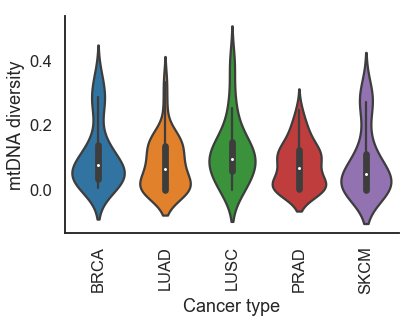

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.violinplot(x="disease", y="average.MT.div", data=data_div_WXS)
#g=sns.stripplot(x="disease", y="average.MT.div", data=data_div_WXS, palette=["black"], jitter=0.05)
g.set(xlabel='Cancer type', ylabel='mtDNA diversity')
g=sns.despine()
plt.xticks(rotation=90)
plt.savefig("MT.diversity.png", bbox_inches='tight')    
plt.savefig("MT.diversity.pdf", bbox_inches='tight')    

In [14]:
df_MT_div_RNASeq = pd.read_csv('MT.diversity.RNASeq.csv')
metadata=pd.read_csv('../outcomes/PILOT.RNASeq.clean.metadata.csv')
data_div_RNASwq=pd.merge(df_MT_div_RNASeq, metadata, on='ID')
data_div_RNASwq.head()

,ID,average.MT.div.RNA.seq,max.MT.div.RNA.Seq,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,022dd75d-0977-40b5-8804-bf0a281c149b_gdc_realn...,0.142216,1.747394,9,TCGA-21-1082,TCGA-21-1082-01A-01R-0692-07,RNASeq,NaN,NaN,NaN,...,61.0,TCGA,LUSC,1,8.0,7.0,8.0,6.0,0e2ee54a-51c9-4868-842d-a2a1c1cfb016,NaN
1,06ab660e-2766-4c97-8f2e-b8495ddc0880_gdc_realn...,0.206278,1.000000,230,TCGA-BF-A5EP,TCGA-BF-A5EP-01A-12R-A27Q-07,RNASeq,NaN,NaN,NaN,...,75.0,TCGA,SKCM,1,8.0,6.0,8.0,6.0,888ef0fc-fc84-4afb-a369-695fee5ae4f6,NaN
2,0ade1371-b218-4f01-a39e-b503d30d24e0_gdc_realn...,0.213427,1.000000,373,TCGA-HC-7210,TCGA-HC-7210-01A-11R-2118-07,RNASeq,NaN,NaN,NaN,...,74.0,TCGA,PRAD,1,7.0,6.0,7.0,5.0,6a5af80e-07ad-4cd3-aaab-5db1090835d9,NaN
3,0afa74a0-7a7c-4b48-a253-45070049ceea_gdc_realn...,0.262498,1.000000,281,TCGA-E2-A9RU,TCGA-E2-A9RU-01A-11R-A41B-07,RNASeq,NaN,NaN,NaN,...,90.0,TCGA,BRCA,1,7.0,6.0,7.0,6.0,6f18f96e-c0c9-4cc4-9fb2-cba8949d5402,NaN
4,0e0dd65a-4a41-4f6c-9ff9-d3cea84de4d7_gdc_realn...,0.291777,1.000000,381,TCGA-HC-7817,TCGA-HC-7817-01B-11R-A29R-07,RNASeq,NaN,NaN,NaN,...,52.0,TCGA,PRAD,1,9.0,7.0,8.0,7.0,f3aa40b9-7b4d-465a-b7c9-591aebdb56c2,NaN


In [46]:
import pandas as pd
data_previous=pd.read_csv('./MT.Reznik/Supplementary_file_1.csv')
data_previous.head()

,Study,Data Type,Sequencing Center,Log2 Fold Change,Sample ID,Tumor MTDNA Copy Number,Normal MTDNA Copy Number,Blood MTDNA Copy Number,Tumor Plate,Normal Plate,Blood Plate,Same Tumor/Normal Plate,Log10 Corrected Tumor,Log10 Corrected Normal,Log10 Corrected Blood
0,ACC,WXS,BCM,-0.921209,OR-A5K9,0.000096,0.000182,NaN,BCM=A29I,BCM=A29L,NaN,False,-4.018318,-3.821555,NaN
1,ACC,WXS,BCM,-3.796877,OR-A5KB,0.000076,0.001059,NaN,BCM=A30A,BCM=A30A,NaN,True,-4.325040,-3.182066,NaN
2,ACC,WXS,BCM,1.142686,P6-A5OH,0.000434,0.000197,NaN,BCM=A30A,BCM=A30A,NaN,True,-3.569293,-3.913275,NaN
3,ACC,WXS,BCM,2.269510,PK-A5HB,0.000270,0.000056,NaN,BCM=A29I,BCM=A29L,NaN,False,-3.569388,-4.333128,NaN
4,ACC,WXS,BCM,-0.110230,PK-A5HC,0.000300,0.000324,NaN,BCM=A30A,BCM=A30A,NaN,True,-3.730255,-3.697072,NaN


In [47]:
data_previous['patientBarcode'] = 'TCGA-' + data_previous['Sample ID'].astype(str)


data_previous_WXS=data_previous.loc[data_previous['Data Type'] == 'WXS']
data_previous_WGS=data_previous.loc[data_previous['Data Type'] == 'WGS']

print "WXS",data_previous_WGS.shape[0]
print "WGS",data_previous_WXS.shape[0]

WXS 665
WGS 5540


In [59]:
data_previous_WGS.head()

,Study,Data Type,Sequencing Center,Log2 Fold Change,Sample ID,Tumor MTDNA Copy Number,Normal MTDNA Copy Number,Blood MTDNA Copy Number,Tumor Plate,Normal Plate,Blood Plate,Same Tumor/Normal Plate,Log10 Corrected Tumor,Log10 Corrected Normal,Log10 Corrected Blood,patientBarcode
87,BLCA,WGS,HMS-RK,-1.934990,BL-A13I,0.000366,0.001400,NaN,HMS-RK=A13U,HMS-RK=A13U,NaN,True,-3.436424,-2.853934,NaN,TCGA-BL-A13I
88,BLCA,WGS,HMS-RK,-2.324803,BL-A3JM,0.000363,0.001819,NaN,HMS-RK=A21C,HMS-RK=A21C,NaN,True,-3.439984,-2.740149,NaN,TCGA-BL-A3JM
89,BLCA,WGS,HMS-RK,0.147960,BT-A20N,0.001385,0.001250,NaN,HMS-RK=A14U,HMS-RK=A14U,NaN,True,-2.858470,-2.903010,NaN,TCGA-BT-A20N
90,BLCA,WGS,HMS-RK,-2.116381,BT-A20O,0.000265,0.001148,NaN,HMS-RK=A14U,HMS-RK=A14U,NaN,True,-3.577268,-2.940173,NaN,TCGA-BT-A20O
91,BLCA,WGS,HMS-RK,-0.445247,BT-A20R,0.000896,0.001219,NaN,HMS-RK=A16N,HMS-RK=A16N,NaN,True,-3.047909,-2.913876,NaN,TCGA-BT-A20R


In [60]:
data_cov_WXS.head()

,ID,cov,cov.MT,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,...,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0,cov_MT_norm
0,003860a34c9b244a5d8435b220ca5673,5.390855,60.111896,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN,11.150716
1,04dad306f9be80db39f4be578091aa11,4.966536,194.140141,246,TCGA-BH-A1EY,TCGA-BH-A1EY-01A-11D-A13L-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,7.0,6.0,7.0,6.0,0741b5db-4405-42ba-b63a-c6ee4f341480,NaN,39.089646
2,08886fe521e2ff176295468dc519d9f3,3.162184,43.398334,197,TCGA-A7-A13G,TCGA-A7-A13G-01B-04D-A22N-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,8.0,6.0,7.0,5.0,6cd9baf5-bbe0-4c1e-a87f-c53b3af22890,NaN,13.724165
3,09f52a751a3bd08f2fd4dcc61a046ed0,4.683656,295.264168,256,TCGA-C8-A1HK,TCGA-C8-A1HK-01A-21D-A13L-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,8.0,6.0,7.0,6.0,52c35691-efca-42f5-a03e-02c9f872275c,NaN,63.041392
4,0e66d92c70e71ca68bc7df03f140ac23,3.325347,434.680186,188,TCGA-A2-A25D,TCGA-A2-A25D-01A-12D-A16D-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,9.0,8.0,9.0,8.0,3b963d72-ba5c-467b-83c9-fbdb462510a3,NaN,130.717258


In [61]:
data_merged_WXS=pd.merge(data_cov_WXS, data_previous_WXS, on='patientBarcode')
data_merged_WXS.shape[0]
data_merged_WXS.head()

,ID,cov,cov.MT,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,...,Tumor MTDNA Copy Number,Normal MTDNA Copy Number,Blood MTDNA Copy Number,Tumor Plate,Normal Plate,Blood Plate,Same Tumor/Normal Plate,Log10 Corrected Tumor,Log10 Corrected Normal,Log10 Corrected Blood
0,003860a34c9b244a5d8435b220ca5673,5.390855,60.111896,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,1.567725,NaN,0.000173,WUGSC=A25Q,NaN,WUGSC=A25Q,NaN,-4.410398,NaN,-4.366668
1,04dad306f9be80db39f4be578091aa11,4.966536,194.140141,246,TCGA-BH-A1EY,TCGA-BH-A1EY-01A-11D-A13L-09,WGS,NaN,NaN,NaN,...,2.030323,0.000979,NaN,WUGSC=A13L,WUGSC=A188,NaN,False,-4.407481,-3.870742,NaN
2,09f52a751a3bd08f2fd4dcc61a046ed0,4.683656,295.264168,256,TCGA-C8-A1HK,TCGA-C8-A1HK-01A-21D-A13L-09,WGS,NaN,NaN,NaN,...,5.881608,NaN,0.000249,WUGSC=A13L,NaN,WUGSC=A13O,NaN,-3.945550,NaN,-4.488673
3,0e66d92c70e71ca68bc7df03f140ac23,3.325347,434.680186,188,TCGA-A2-A25D,TCGA-A2-A25D-01A-12D-A16D-09,WGS,NaN,NaN,NaN,...,7.643752,NaN,0.000293,WUGSC=A16D,NaN,WUGSC=A16D,NaN,-3.926245,NaN,-4.341991
4,0fb4ae5b4fe04b81ebf63b3eac09c4c3,7.979292,71.411371,192,TCGA-A2-A4RX,TCGA-A2-A4RX-01A-11D-A25Q-09,WGS,NaN,NaN,NaN,...,1.361287,NaN,0.000314,WUGSC=A25Q,NaN,WUGSC=A25Q,NaN,-4.471718,NaN,-4.108776


In [62]:
data_merged_WGS=pd.merge(data_cov_WXS, data_previous_WGS, on='patientBarcode')
data_merged_WGS.shape[0]

10

In [63]:
data_merged_WGS_WES=pd.merge(data_previous_WGS, data_previous_WXS, on='patientBarcode')
data_merged_WGS_WES.head()

,Study_x,Data Type_x,Sequencing Center_x,Log2 Fold Change_x,Sample ID_x,Tumor MTDNA Copy Number_x,Normal MTDNA Copy Number_x,Blood MTDNA Copy Number_x,Tumor Plate_x,Normal Plate_x,...,Tumor MTDNA Copy Number_y,Normal MTDNA Copy Number_y,Blood MTDNA Copy Number_y,Tumor Plate_y,Normal Plate_y,Blood Plate_y,Same Tumor/Normal Plate_y,Log10 Corrected Tumor_y,Log10 Corrected Normal_y,Log10 Corrected Blood_y
0,BLCA,WGS,HMS-RK,-2.324803,BL-A3JM,0.000363,0.001819,NaN,HMS-RK=A21C,HMS-RK=A21C,...,0.059722,0.000024,NaN,BI=A21A,BI=A21A,NaN,True,-5.740375,-5.142924,NaN
1,BLCA,WGS,HMS-RK,0.147960,BT-A20N,0.001385,0.001250,NaN,HMS-RK=A14U,HMS-RK=A14U,...,0.058320,0.000010,NaN,BI=A14W,BI=A14W,NaN,True,-5.236756,-5.013236,NaN
2,BLCA,WGS,HMS-RK,-2.116381,BT-A20O,0.000265,0.001148,NaN,HMS-RK=A14U,HMS-RK=A14U,...,0.018325,0.000013,NaN,BI=A14W,BI=A14W,NaN,True,-5.739533,-4.901414,NaN
3,BLCA,WGS,HMS-RK,-0.445247,BT-A20R,0.000896,0.001219,NaN,HMS-RK=A16N,HMS-RK=A16N,...,0.091075,0.000020,NaN,BI=A16O,BI=A16O,NaN,True,-5.599705,-5.250682,NaN
4,BLCA,WGS,HMS-RK,-1.374415,BT-A20U,0.000399,0.001035,NaN,HMS-RK=A14U,HMS-RK=A14U,...,0.015377,0.000004,NaN,BI=A14W,BI=A14W,NaN,True,-5.815689,-5.403240,NaN


(0.9261251903998811, 1.0425560419241751e-43)

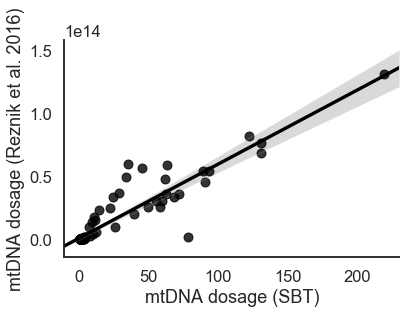

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



data_merged_WXS['Tumor MTDNA Copy Number'] *= 1

g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.regplot(x="cov_MT_norm", y="Tumor MTDNA Copy Number", data=data_merged_WXS,color="black")
g.set(xlabel='mtDNA dosage (SBT)', ylabel='mtDNA dosage (Reznik et al. 2016)')
g=sns.despine()





#plt.show(g)
plt.savefig("MT.eLife.SBT.png", bbox_inches='tight')

stats.pearsonr(data_merged_WXS['cov_MT_norm'], data_merged_WXS['Tumor MTDNA Copy Number'])

(0.6121708017978933, 0.05994562347039277)

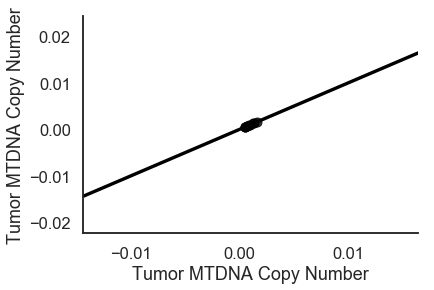

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.regplot(x="Tumor MTDNA Copy Number", y="Tumor MTDNA Copy Number", data=data_merged_WGS,color="black")
#g.set(xlabel='rDNA (5.8S) dosage', ylabel='rDNA (28S) dosage')
g=sns.despine()
#plt.show(g)
plt.savefig("MT.png", bbox_inches='tight')

stats.pearsonr(data_merged_WGS['cov_MT_norm'], data_merged_WGS['Tumor MTDNA Copy Number'])

(0.20218996917010715, 1.319007497860601e-06)

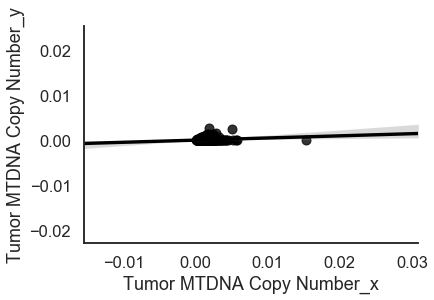

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.regplot(x="Tumor MTDNA Copy Number_x", y="Tumor MTDNA Copy Number_y", data=data_merged_WGS_WES,color="black")
#g.set(xlabel='rDNA (5.8S) dosage', ylabel='rDNA (28S) dosage')
g=sns.despine()
#plt.show(g)
plt.savefig("MT.png", bbox_inches='tight')

stats.pearsonr(data_merged_WGS_WES['Tumor MTDNA Copy Number_x'], data_merged_WGS_WES['Tumor MTDNA Copy Number_y'])